In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import warnings
warnings.simplefilter("ignore")

In [39]:
colnames=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
print(len(colnames))

4


In [40]:
iris_data=pd.read_csv('/content/drive/MyDrive/iris.txt', sep=" ", names=colnames,header=None)

In [41]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4


In [42]:
iris_data.shape

(150, 4)

In [43]:
def euclidean_distance(point1, point2):
  dist = np.linalg.norm(point1 - point2)
  return dist

In [44]:
def manhattan_distance(point1, point2):
    return np.sum([abs(value1 - value2) for value1, value2 in zip(point1, point2)])

In [45]:
def cosine_similarity(point1,point2):
  return np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))

In [ ]:
def sse_k(data,cluster,centroids,K,metric):
  sse = []
  count = [0]*K
  dist1 = 0
  dist2 = 0
  dist3 = 0
  for i in range(data.shape[0]):
    if cluster[i] == 1:
      dist1+= (euclidean_distance(data[i],centroids[0])**2)
      count[0]+=1
    elif cluster[i] == 2:
      dist2+= (euclidean_distance(data[i],centroids[1])**2)
      count[1]+=1
    elif cluster[i] == 3:
      dist3+= (euclidean_distance(data[i],centroids[2])**2)
      count[2]+=1
  # print(count[0])
  # print(count[1])
  # print(count[2])
  # print(dist1)
  # print(dist2)
  # print(dist3)
  #sse_1 = (dist1/count1)+(dist2/count2)+(dist3/count3)
  #sse.append(sse_1)
  sse_1 = dist1+dist2+dist3
  
  #sse_total = np.array(sse)
  return sse_1,count      

In [47]:
def ssb(data,count,centroids,K):
  cent_1 = [0]*len(centroids[0])
  for i in range(K):
    cent_1 += centroids[i]
  
  cent_1 /= K

  
  print(cent_1)
  value = 0
  for i in range(K):
    print((euclidean_distance(centroids[i],cent_1)**2))
    value+= count[i]*(euclidean_distance(centroids[i],cent_1)**2)
    print(value,i)
  return value

In [48]:
import random
from collections import defaultdict
def K_Means_predict_man(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*iris_data1.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    #print(data[num1])
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=manhattan_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.mean(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [49]:
import random
from collections import defaultdict
def K_Means_predict(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*iris_data1.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  print("Initial Cluster Center Indices \n",x)
  print("Initial Cluster Centers\n")
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    print(data[num1])
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=euclidean_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.mean(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [50]:
import random
from collections import defaultdict
def K_Means_predict_man1(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*iris_data1.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    #print(data[num1])
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=manhattan_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.median(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [51]:
import random
from collections import defaultdict
def K_Means_predict1(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*iris_data1.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=euclidean_distance(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=min(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.median(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [52]:
import random
from collections import defaultdict
def K_Means_predict_cos(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*iris_data1.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=cosine_similarity(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=max(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.mean(label,axis=0)
      #print(centroid_new)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      #print(a)
      #print(b)
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [53]:
import random
from collections import defaultdict
def K_Means_predict_cos1(data,K,max_iter,rand_seed):
  centroids = defaultdict(int)
  cluster = [0]*iris_data1.shape[0]
  random.seed(rand_seed)
  mylist = np.arange(data.shape[0])
  list1 = mylist.tolist()
  x = random.sample(list1,K)
  #print(x)
  for i in range(K):
  #initializing 1st cluster center
    num1 = x[i]
    centroids[i] = data[num1]

  iter=0
  #print(2)

  for iteration in range(max_iter):
    iter+=1
    labels=defaultdict(list)
    #print(data.shape)
    #print(centroids)

    for keys in range(K):
      labels[keys]=[]

    for datapoint1 in range(len(data)):
      distance=[]
      for datapoint2 in range(K):
        dist=cosine_similarity(data[datapoint1],centroids[datapoint2])
        #print("Dp",data[i])
        #print("Cent",centroids[j])
        #print(dist)
        distance.append(dist)
      min_distance=max(distance)
      index=distance.index(min_distance)
      labels[index].append(data[datapoint1])
      cluster[datapoint1] = index+1
      centroid_old=dict(centroids)
    
    for i in range(K):
      label=labels[i]
    
      centroid_new=np.median(label,axis=0)
      centroids[i]=centroid_new
      flag=1

    for i in range(K):
      a=centroids[i]
      b=centroid_old[i]
      temp = 0
      for i in range(len(a)):
        d = abs(a[i] - b[i])
        temp+=d
      if temp !=0:
        flag = 0

      
    if flag==1:
      break
  #print(iter)
  return labels,centroids,cluster,iter


In [66]:
sse_1 = []
sse_2 = []
sse_3 = []
count11 = []
ssb_k = []
tss_k = []
from collections import defaultdict
iris_data1 = iris_data.to_numpy()
for rand_seed in range(20):
  classes,centroids,cluster,iter=K_Means_predict(iris_data1,3,10000,rand_seed)
  classes1,centroids1,cluster1,iter1=K_Means_predict1(iris_data1,3,10000,rand_seed)
  classes2,centroids2,cluster2,iter2=K_Means_predict_man(iris_data1,3,10000,rand_seed)
  classes3,centroids3,cluster3,iter3=K_Means_predict_man1(iris_data1,3,10000,rand_seed)
  classes4,centroids4,cluster4,iter4=K_Means_predict_cos(iris_data1,3,10000,rand_seed)
  classes5,centroids5,cluster5,iter5=K_Means_predict_cos1(iris_data1,3,10000,rand_seed)
  for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
  for i in range(0,3):
    classes1[i]=np.array(classes1[i]).tolist()
  print("Iteration=%d \n"%rand_seed)    
  print("Euclidean")
  print("Mean \n")
  print("Max Iteratins Run=%d \n"%iter)
  print("Final Centroids:",centroids)
  SSE,count = sse_k(iris_data1,cluster,centroids,3,1)
  sse_1.append(SSE)
  SSB = ssb(iris_data1,count,centroids,3)
  ssb_k.append(SSB)
  count11.append(count)
  ssb_k.append(SSB)
  count11.append(count)
  print("Total SSE =%f"%SSE)
  print("Total SSB =%2f \n"%SSB)
  print("\n")
  for i in range(0,3):
    print("Cluster %d"%i,len(classes[i]))
  print("Median \n")
  print("Max Iteratins Run=%d \n"%iter1)
  print("Final Centroids:",centroids1)
  SSE,count = sse_k(iris_data1,cluster1,centroids1,3,1)
  print("Total SSE =%2f"%SSE)
  #print("Total SSB =%2f \n"%SSB)
  print("\n")  
  for i in range(0,3):
    print("Cluster %d"%i,len(classes1[i]))
  print("\n")
  print("Manhattan")
  print("Mean \n")
  print("Max Iteratins Run=%d \n"%iter2)
  print("Final Centroids:",centroids2)
  SSE,count = sse_k(iris_data1,cluster2,centroids2,3,2)
  print("Total SSE =%2f"%SSE)
  print("\n")
  for i in range(0,3):
    print("Cluster %d"%i,len(classes2[i]))
  print("Median \n")
  print("Max Iteratins Run=%d \n"%iter3)
  print("Final Centroids:",centroids3)
  SSE,count = sse_k(iris_data1,cluster3,centroids3,3,2)
  print("Total SSE =%2f"%SSE)
  print("\n")  
  for i in range(0,3):
    print("Cluster %d"%i,len(classes3[i]))
  print("\n")
  print("Cosine")
  print("Mean \n")
  print("Max Iteratins Run=%d \n"%iter4)
  print("Final Centroids:",centroids4)
  SSE,count = sse_k(iris_data1,cluster4,centroids4,3,3)
  print("Total SSE =%2f"%SSE)
  print("\n")
  for i in range(0,3):
    print("Cluster %d"%i,len(classes4[i]))
  print("Median \n")
  print("Max Iteratins Run=%d \n"%iter5)
  print("Final Centroids:",centroids5)
  SSE,count = sse_k(iris_data1,cluster5,centroids5,3,3)
  sse_3.append(SSE)
  print("Total SSE =%2f"%SSE)
  print("\n")  
  for i in range(0,3):
    print("Cluster %d"%i,len(classes5[i]))
  print("\n")
  print("**********XXXXX********")
  #print(centroids)

Initial Cluster Center Indices 
 [98, 107, 10]
Initial Cluster Centers

[6.4 2.9 4.3 1.3]
[5.8 2.8 5.1 2.4]
[5.1 3.8 1.6 0.2]
Iteration=0 

Euclidean
Mean 

Max Iteratins Run=6 

Final Centroids: defaultdict(<class 'int'>, {0: array([5.88360656, 2.74098361, 4.38852459, 1.43442623]), 1: array([6.85384615, 3.07692308, 5.71538462, 2.05384615]), 2: array([5.006, 3.418, 1.464, 0.244])})
61
39
50
38.29081967213114
25.413846153846155
15.2404
[5.91448424 3.07863556 3.85596974 1.24409079]
0.4348045249527312
26.5230760221166 0
4.995531182067555
221.34879212275126 1
7.662212642538981
604.4594242497003 2
Total SSE =78.945066
Total SSB =604.459424 



Cluster 0 61
Cluster 1 39
Cluster 2 50
Median 

Max Iteratins Run=4 

Final Centroids: defaultdict(<class 'int'>, {0: array([5.9, 2.8, 4.5, 1.4]), 1: array([6.7, 3. , 5.6, 2.1]), 2: array([5. , 3.4, 1.5, 0.2])})
61
39
50
39.39000000000001
26.93
15.420000000000005
Total SSE =81.740000


Cluster 0 61
Cluster 1 39
Cluster 2 50


Manhattan
Mean 

Max Iter

In [57]:
center = []
for i in range(len(centroids)):
  center.append(centroids[i])
cent = list(center)
cent_1 = np.array(cent)

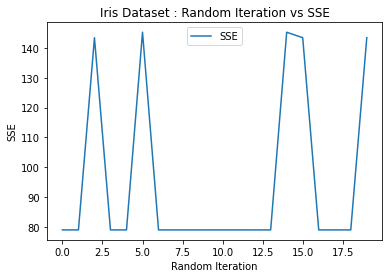

In [62]:
iterations = np.arange(20)
#print(sse_1)
x = plt.subplot( )
x.plot(iterations, sse_1, label='SSE')
#x.plot(k_1, cv_auc, label='AUC CV')
plt.title('Iris Dataset : Random Iteration vs SSE')
plt.xlabel('Random Iteration')
plt.ylabel('SSE')
x.legend()
plt.show()

[96.56999999999998, 153.15000000000003, 153.70000000000002, 93.83999999999999, 93.83999999999999, 153.74, 96.57, 96.56999999999998, 93.61999999999998, 96.57, 93.83999999999999, 93.61999999999998, 93.61999999999998, 93.61999999999999, 155.59500000000003, 153.55, 93.83999999999999, 93.61999999999998, 93.61999999999999, 153.70000000000002]


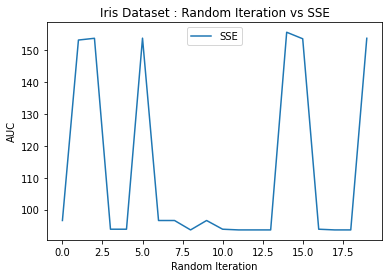

In [67]:
iterations = np.arange(20)
print(sse_3)
x = plt.subplot( )
x.plot(iterations, sse_3, label='SSE')
#x.plot(k_1, cv_auc, label='AUC CV')
plt.title('Iris Dataset : Random Iteration vs SSE')
plt.xlabel('Random Iteration')
plt.ylabel('AUC')
x.legend()
plt.show()

In [ ]:
import seaborn as sns
df_iris = pd.DataFrame(iris_data1, columns = colnames)
df_iris['cluster'] = cluster
sns.FacetGrid(df_iris, hue="cluster", size=5, hue_kws={"marker":["o", "o", "o", "x"]}).map(plt.scatter, "sepal_length", "sepal_width").add_legend()

In [ ]:
plt.scatter(df_iris['sepal_length'], df_iris['sepal_width'],c=df_iris['cluster'], s=50, cmap='viridis')
centers = cent_1
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.8);

In [ ]:
plt.scatter(df_iris['petal_length'], df_iris['petal_width'],c=df_iris['cluster'], s=50, cmap='viridis')
centers = cent_1
plt.scatter(centers[:,2], centers[:,3], c='black', s=200, alpha=0.8);

In [ ]:
print(classes)

In [ ]:
print(cluster)

In [ ]:
with open('cluster8.txt', 'w') as f:
  for i in cluster:
    f.write(str(i) +"\n")

In [ ]:
sse = []
count1 = []
for rand_seed in range(1):
  classes,centroids,cluster,iter4=K_Means_predict(iris_data1,3,10000,rand_seed)
  SSE,count = sse_k(iris_data1,cluster,centroids,3)
  sse.append(SSE)
  count1.append(count)
  print("Total SSE =%2f"%SSE)
  #classes1,centroids1,cluster1,iter2=K_Means_predict_cos1(iris_data1,3,10000,rand_seed)
  for i in range(0,3):
    classes[i]=np.array(classes[i]).tolist()
  for i in range(0,3):
    classes1[i]=np.array(classes1[i]).tolist()  
  
  print("Iteration=%d \n"%rand_seed)
  print("Mean \n")
  # for i in range(0,3):
  #   print(len(classes[i]))
  # print("Median \n")  
  # for i in range(0,3):
  #   print(len(classes1[i]))
  # print("\n")
  #print(centroids)

In [ ]:
# from collections import defaultdict
# iris_data1 = iris_data.to_numpy()
# for rand_seed in range(5):
#   classes,centroids,cluster=K_Means_predict(iris_data2,3,10000,rand_seed)
#   for i in range(0,3):
#     classes[i]=np.array(classes[i]).tolist()
  
#   for i in range(0,3):
#     print(len(classes[i]))
#   #print(centroids)

rand_seed = 0
classes,centroids,cluster,iter=K_Means_predict_cos1(iris_data1,3,10000,rand_seed)
for i in range(0,3):
  classes[i]=np.array(classes[i]).tolist()
  
for i in range(0,3):
  print(len(classes[i]))

In [ ]:
print(cluster)

In [ ]:
with open('cluster101.txt', 'w') as f:
  for i in cluster:
    f.write(str(i) +"\n")

In [ ]:
SSE = sse_k(iris_data1,cluster,centroids,3)

In [ ]:
print(SSE)